In [1]:
import pandas as pd
import numpy as np

In [2]:
vacation_df = pd.read_csv("vacation.csv")

In [3]:
vacation_df.head(5)

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,no,no,no,no,no,no,no,no,no,no
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,no,no,yes,no,no,no,no,no,no,yes
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,no,yes,yes,no,yes,no,no,no,yes,no
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,no,no,yes,no,no,yes,no,no,no,no


In [5]:
vacation_df.columns

Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt',
       'do sports', 'excitement, a challenge', 'not exceed planned budget',
       'realise creativity', 'fun and entertainment', 'good company',
       'health and beauty', 'free-and-easy-going', 'entertainment facilities',
       'not care about prices', 'life style of the local people',
       'intense experience of nature', 'cosiness/familiar atmosphere',
       'maintain unspoilt surroundings', 'everything organised',
       'unspoilt nature/natural landscape', 'cultural offers',
       'change of surroundings'],
      dtype='object')

In [5]:
vacation_df.shape

(1000, 32)

In [6]:
description = vacation_df.describe(include='all') 
print(description)


       Gender          Age   Education              Income Income2  \
count    1000  1000.000000  992.000000                 934     934   
unique      2          NaN         NaN                   9       5   
top      Male          NaN         NaN  $30,001 to $60,000  30-60k   
freq      512          NaN         NaN                 265     265   
mean      NaN    44.168000    4.813508                 NaN     NaN   
std       NaN    14.539228    2.422252                 NaN     NaN   
min       NaN    18.000000    1.000000                 NaN     NaN   
25%       NaN    32.000000    3.000000                 NaN     NaN   
50%       NaN    42.000000    6.000000                 NaN     NaN   
75%       NaN    57.000000    7.000000                 NaN     NaN   
max       NaN   105.000000    8.000000                 NaN     NaN   

          Occupation State Relationship.Status   Obligation Obligation2  ...  \
count            941  1000                 996  1000.000000        1000  ...   

In [7]:
inc2 = vacation_df['Income2']

In [8]:
original_levels = inc2.unique()
original_levels

array(['30-60k', '>120k', '90-120k', '<30k', '60-90k', nan], dtype=object)

In [9]:
new_levels = ["<30k","30-60k","60-90k","90-120k",">120k"]

In [10]:
inc2_new = pd.Categorical(inc2,categories=new_levels,ordered=True)

In [11]:
vacation_df['Income2'] = inc2_new

In [12]:
print(vacation_df['Income2'].cat.categories)

Index(['<30k', '30-60k', '60-90k', '90-120k', '>120k'], dtype='object')


In [13]:
print(vacation_df['Income2'].value_counts())

Income2
30-60k     265
60-90k     233
<30k       150
90-120k    146
>120k      140
Name: count, dtype: int64


In [14]:
# Create a contingency table to compare the original and new Income2 categories
contingency_table = pd.crosstab(index=vacation_df['Income2'], columns=vacation_df['Income2'].cat.codes, 
                                 rownames=['Original Income2'], colnames=['New Income2'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
New Income2         0    1    2    3    4
Original Income2                         
<30k              150    0    0    0    0
30-60k              0  265    0    0    0
60-90k              0    0  233    0    0
90-120k             0    0    0  146    0
>120k               0    0    0    0  140


In [15]:
import matplotlib.pyplot as plt

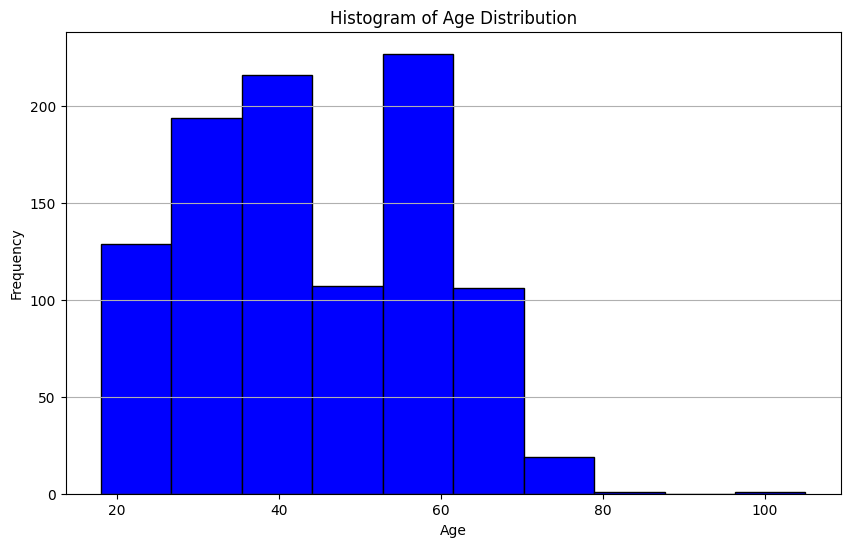

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(vacation_df['Age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.grid(axis='y')
plt.show()

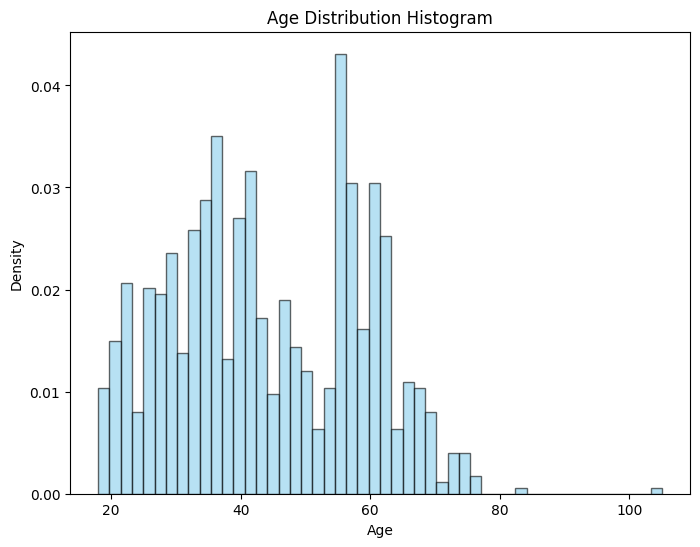

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(vacation_df['Age'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution Histogram')
plt.show()

In [17]:
vacation_df["Age"].describe()

count    1000.000000
mean       44.168000
std        14.539228
min        18.000000
25%        32.000000
50%        42.000000
75%        57.000000
max       105.000000
Name: Age, dtype: float64

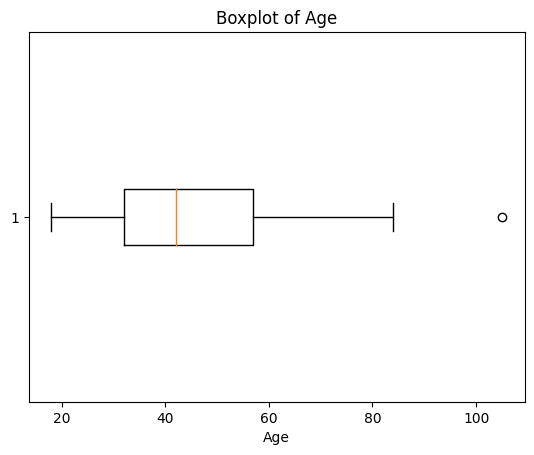

In [18]:
plt.boxplot(vacation_df['Age'], vert=False) 
plt.xlabel('Age')  
plt.title('Boxplot of Age')  
plt.show()

In [ ]:
yes = 100 * (vacation_df.iloc[:, 12:32] == "yes").mean() 
yes_sorted = yes.sort_values()

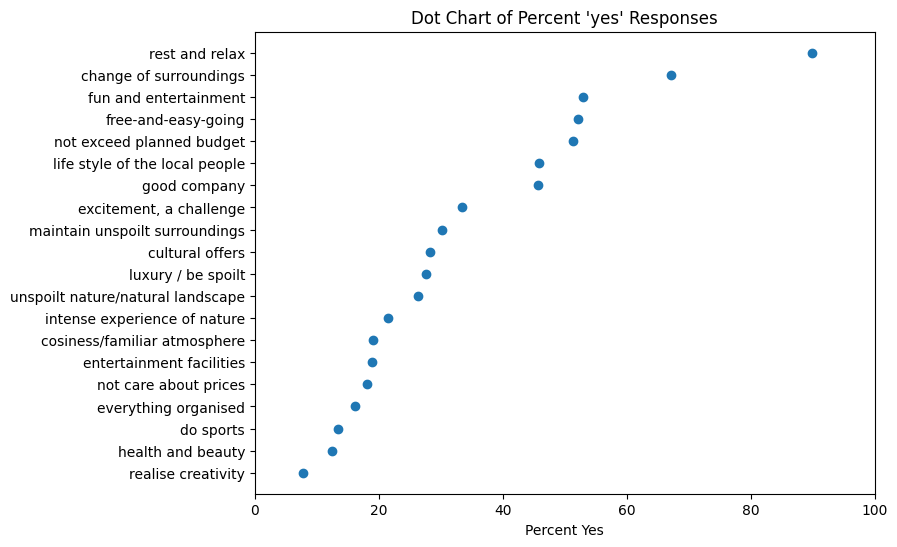

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(yes_sorted,yes_sorted.index)
plt.xlabel("Percent Yes")
plt.xlim(0,100)
plt.title("Dot Chart of Percent 'yes' Responses")
plt.show()

In [21]:
count_values=vacation_df["Income"].value_counts()
count_values

Income
$30,001 to $60,000      265
$60,001 to $90,000      233
Less than $30,000       150
$90,001 to $120,000     146
$120,001 to $150,000     72
$150,001 to $180,000     32
$180,001 to $210,000     15
more than $240,001       11
$210,001 to $240,000     10
Name: count, dtype: int64

In [22]:
sorted_count_values = count_values.sort_values()
print(sorted_count_values)

Income
$210,001 to $240,000     10
more than $240,001       11
$180,001 to $210,000     15
$150,001 to $180,000     32
$120,001 to $150,000     72
$90,001 to $120,000     146
Less than $30,000       150
$60,001 to $90,000      233
$30,001 to $60,000      265
Name: count, dtype: int64


In [26]:
vacation_df["Income2"].value_counts()

Income2
30-60k     265
60-90k     233
<30k       150
90-120k    146
>120k      140
Name: count, dtype: int64

In [30]:
# Use of binary varibales yes and no . yes represented by 1 and no is represented by 0.
vacmot = (vacation_df == "yes").astype(int)

In [32]:
vacmot.head(5)

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [48]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vacmot_scaled=scaler.fit_transform(vacmot)
vacmot_scaled

array([[ 0.        ,  0.        ,  0.        , ..., -0.59737099,
        -0.62825165, -1.43135617],
       [ 0.        ,  0.        ,  0.        , ..., -0.59737099,
        -0.62825165,  0.69863813],
       [ 0.        ,  0.        ,  0.        , ..., -0.59737099,
         1.59171885, -1.43135617],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.59737099,
        -0.62825165,  0.69863813],
       [ 0.        ,  0.        ,  0.        , ..., -0.59737099,
        -0.62825165, -1.43135617],
       [ 0.        ,  0.        ,  0.        , ..., -0.59737099,
        -0.62825165,  0.69863813]])

In [47]:
vacmot_scaled_df = pd.DataFrame(vacmot_scaled,columns=vacmot.columns)
vacmot_scaled_df

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,-0.921102,-0.523341,-0.484322,-0.657773,-0.438058,-0.597371,-0.628252,-1.431356
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,1.085656,-0.523341,-0.484322,-0.657773,-0.438058,-0.597371,-0.628252,0.698638
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,2.127172,1.085656,-0.523341,2.064742,-0.657773,-0.438058,-0.597371,1.591719,-1.431356
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.071474,-0.470108,-0.921102,1.910802,-0.484322,-0.657773,-0.438058,-0.597371,-0.628252,0.698638
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,1.085656,-0.523341,-0.484322,1.520282,-0.438058,-0.597371,-0.628252,-1.431356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.071474,-0.470108,1.085656,1.910802,-0.484322,1.520282,-0.438058,-0.597371,1.591719,0.698638
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,1.085656,1.910802,-0.484322,1.520282,-0.438058,1.674002,1.591719,-1.431356
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,-0.921102,-0.523341,-0.484322,-0.657773,-0.438058,-0.597371,-0.628252,0.698638
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.482748,-0.470108,-0.921102,-0.523341,-0.484322,-0.657773,-0.438058,-0.597371,-0.628252,-1.431356


In [55]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()

In [57]:
vacmot_pca = pca.fit_transform(vacmot)
vacmot_pca

array([[-1.44137054e+00, -2.66826486e-01,  1.43759364e-01, ...,
        -0.00000000e+00,  0.00000000e+00,  1.69265438e-15],
       [-1.23813549e-01,  5.29135849e-01,  2.23344449e-01, ...,
         4.68276450e-16,  2.27130346e-16,  1.14729138e-15],
       [-6.46651117e-01, -4.23657334e-01,  1.06726214e+00, ...,
        -4.75036746e-16,  1.71527712e-16,  8.81047022e-16],
       ...,
       [-2.95097171e-01, -2.83123692e-01, -9.17252104e-01, ...,
         6.37368455e-18, -1.29129110e-17,  4.27198155e-18],
       [-1.05476224e+00,  3.49092177e-01,  4.70739156e-01, ...,
        -2.14819368e-19,  3.13246652e-18, -1.04287135e-17],
       [-2.01621976e-01,  1.37949983e-01,  4.66907453e-01, ...,
        -1.16827085e-17, -1.89649443e-18, -2.36935165e-19]])

In [63]:
print("Explained Variance (importance of each PC):", pca.explained_variance_)


Explained Variance (importance of each PC): [6.59956081e-01 3.28906672e-01 2.79371253e-01 2.59511850e-01
 2.20497648e-01 2.06984255e-01 1.86116504e-01 1.76182285e-01
 1.64400608e-01 1.40966064e-01 1.32391853e-01 1.29380185e-01
 1.21417032e-01 1.10284227e-01 1.07796403e-01 1.02207299e-01
 9.36057832e-02 8.84808102e-02 7.91795632e-02 5.92595176e-02
 6.41253784e-33 6.06003958e-33 6.06003958e-33 6.06003958e-33
 6.06003958e-33 6.06003958e-33 6.06003958e-33 6.06003958e-33
 6.06003958e-33 6.06003958e-33 6.06003958e-33 5.69952804e-33]


In [65]:
print(pd.DataFrame(pca.components_.T, index=vacmot.columns, columns=[f'PC{i+1}' for i in range(len(vacmot.columns))]))

                                            PC1           PC2           PC3  \
Gender                            -5.379174e-18 -1.998072e-18  1.267387e-18   
Age                               -0.000000e+00  1.110223e-16  0.000000e+00   
Education                          5.551115e-17  0.000000e+00  8.326673e-17   
Income                            -1.387779e-17  2.220446e-16 -5.551115e-17   
Income2                           -0.000000e+00  0.000000e+00  1.387779e-17   
Occupation                        -0.000000e+00  0.000000e+00 -5.551115e-17   
State                             -0.000000e+00 -2.775558e-17 -1.110223e-16   
Relationship.Status               -3.388132e-21  6.938894e-18  5.551115e-17   
Obligation                         4.235165e-22 -3.469447e-18  5.551115e-17   
Obligation2                       -0.000000e+00 -1.734723e-18 -5.551115e-17   
NEP                               -3.308722e-24  4.336809e-19 -2.775558e-17   
Vacation.Behaviour                -2.067952e-25  5.4

In [68]:
pca = PCA()
pca.fit(vacmot)

# Create a summary dataframe for explained variance
summary_df = pd.DataFrame({
    'Component': [f'PCA{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
})

summary_df = summary_df.round(2)
print(summary_df)


   Component  Standard Deviation  Proportion of Variance  \
0       PCA1                0.81                    0.18   
1       PCA2                0.57                    0.09   
2       PCA3                0.53                    0.08   
3       PCA4                0.51                    0.07   
4       PCA5                0.47                    0.06   
5       PCA6                0.45                    0.06   
6       PCA7                0.43                    0.05   
7       PCA8                0.42                    0.05   
8       PCA9                0.41                    0.05   
9      PCA10                0.38                    0.04   
10     PCA11                0.36                    0.04   
11     PCA12                0.36                    0.04   
12     PCA13                0.35                    0.03   
13     PCA14                0.33                    0.03   
14     PCA15                0.33                    0.03   
15     PCA16                0.32        

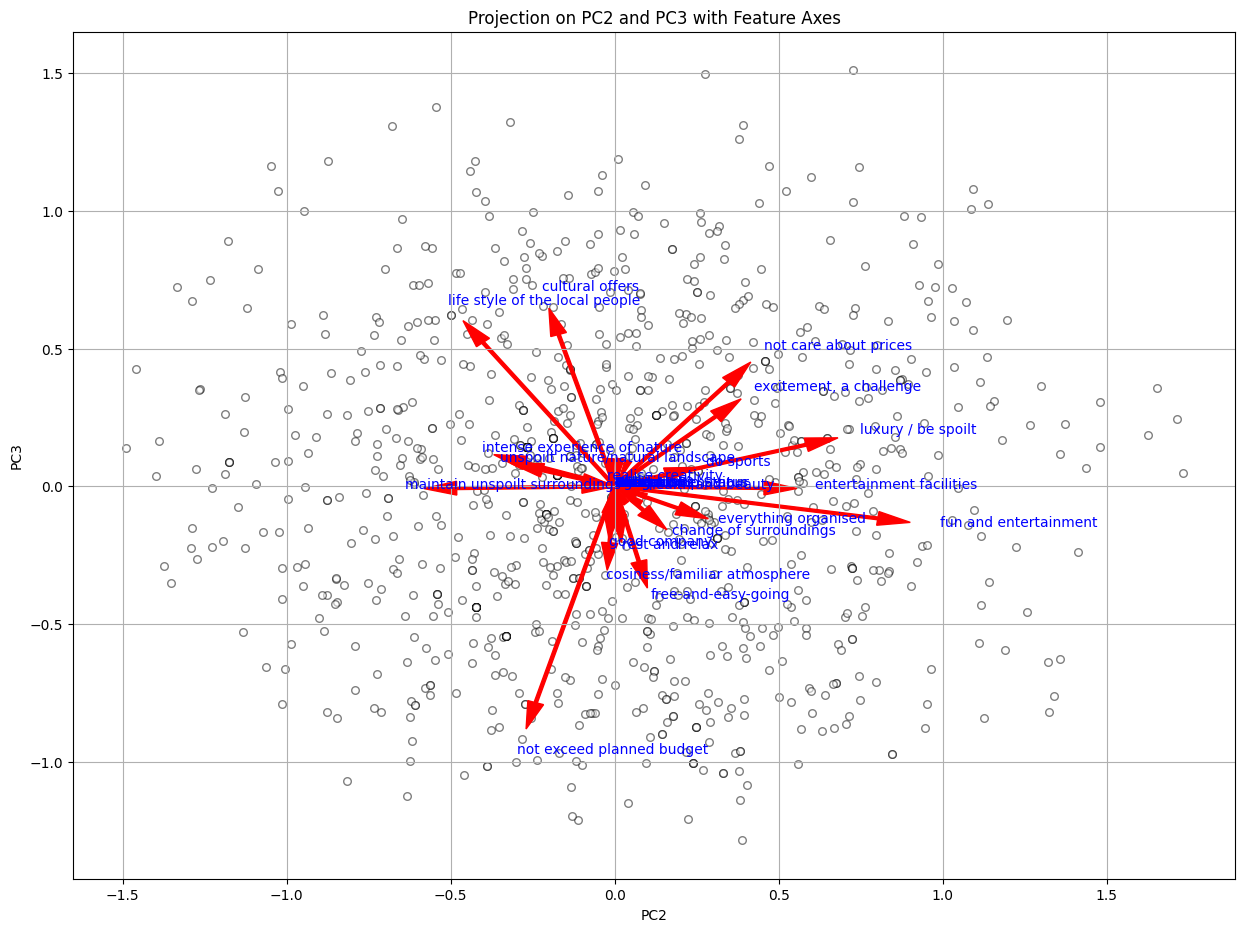

In [117]:
#PCA
projected_data = pca.fit_transform(vacmot) 
feature_names = vacation_df.columns.to_list()

# Plot the second and third components 
plt.figure(figsize=(15, 11))
plt.scatter(projected_data[:, 1], projected_data[:, 2], color='white', alpha=0.5, edgecolor='k', s=30)
plt.xlabel('PC2')
plt.ylabel('PC3')

for i, feature in enumerate(feature_names):
    arrow_x = pca.components_[1, i] * max(projected_data[:, 1])
    arrow_y = pca.components_[2, i] * max(projected_data[:, 2])
    
    # Plot the arrow
    plt.arrow(0, 0, arrow_x, arrow_y, color='red', width=0.01, head_width=0.05, head_length=0.1, length_includes_head=True)
    
    plt.text(arrow_x * 1.1, arrow_y * 1.1, feature, color='blue', fontsize=10)

plt.title('Projection on PC2 and PC3 with Feature Axes')
plt.grid(True)
plt.show()
